<H2>Data Analysis:  Netflix Movies and TV Shows</H2>

<H3>Abstract</H3>

<P>The dataset that is part of this project consists of movies and TV shows available on Netflix as of 2021. The dataset is collected from Flixable, which is a third-party Netflix search engine.  This dataset can be found at Kaggle:  <A HREF="https://www.kaggle.com/shivamb/netflix-shows">https://www.kaggle.com/shivamb/netflix-shows</A></P>

<H3>Prepare Data</H3>

<P>To get started, let's import our libraries.</P>

In [1]:
# Import the pandas to read in Excel spreadsheet files
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#import nltk
from io import StringIO
import collections as co
sns.set()
%matplotlib inline 

<P>Next, we will read our data into a data frame and print out the data frame in its unedited form.</P>

In [2]:
# Read the data into a dataframe from a .csv spreadsheet using the read_csv command
df_netflix = pd.read_csv('netflix_titles.csv')

# Print out the dataframe
print ('Data read successfully into a dataframe.  Here is the listing:\n')

# Print out all the rows (head() prints out the first five rows actually)
df_netflix.head()

Data read successfully into a dataframe.  Here is the listing:



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


<P>Get the dimensions of the data frame</P>

In [3]:
# Dimensions of the data set for Netflix
df_netflix.shape

(7787, 12)

<H3>Assessing The Data</H3>

<P>From what we have obtained, there are 7787 entries arranged in 12 columns.  Let's assess each column:</P>

<UL>
    <LI><B>show_id:</B>  This is the unique identifier for the movie or TV show.</LI>
    <LI><B>type:</B>  The name of the category for the entry, whether it is a movie or TV show.</LI>
    <LI><B>title:</B>  The title of the movie or TV show.</LI>
    <LI><B>director:</B>  Name of the director for the movie or TV show.</LI>
    <LI><B>cast:</B>  Names of the actors and actresses.</LI>
    <LI><B>country:</B>  Name of country where movie or TV show was filmed.</LI>
    <LI><B>date_added:</B>  The date when the title was added to the Netflix catalog.</LI>
    <LI><B>release_year:</B>  Year of production</LI>
    <LI><B>rating:</B>  The rating of the movie or TV show</LI>
    <LI><B>duration:</B>  Running time (movie) or number of seasons (TV show)</LI>
    <LI><B>listed_in:</B>  Category or categories that the movie or TV show falls under.</LI>
    <LI><B>description:</B>  Synopsis of the movie or TV show</LI>
</UL>

In [4]:
# Obtain a sample of entries from the dataframe
df_netflix.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2499,s2500,Movie,Goosebumps 2: Haunted Halloween,Ari Sandel,"Jeremy Ray Taylor, Madison Iseman, Caleel Harr...","United States, United Kingdom","April 25, 2019",2018,PG,90 min,"Children & Family Movies, Comedies",Three teens spend their Halloween trying to st...
7431,s7432,TV Show,Virgin River,NaN,"Alexandra Breckenridge, Martin Henderson, Tim ...",United States,"November 27, 2020",2020,TV-14,2 Seasons,"Romantic TV Shows, TV Dramas","Searching for a fresh start, a nurse practitio..."
6186,s6187,Movie,The Bund,NaN,Chow Yun Fat,Hong Kong,"September 20, 2018",1983,TV-14,103 min,"Action & Adventure, Dramas, International Movies","After losing everything, a young man rebuilds ..."
758,s759,Movie,Basic Instinct,Paul Verhoeven,"Michael Douglas, Sharon Stone, George Dzundza,...","United States, France","October 1, 2020",1992,R,128 min,"Classic Movies, Thrillers",A detective investigating a rock star's brutal...
503,s504,Movie,Anchor Baby,Lonzo Nzekwe,"Omoni Oboli, Sam Sarpong, Terri Oliver, Colin ...","Canada, Nigeria","May 20, 2020",2010,TV-MA,97 min,"Dramas, International Movies",A Nigerian couple living in the U.S. face agon...
306,s307,TV Show,Adam Ruins Everything,NaN,"Adam Conover, Adam Lustick, Emily Axford",United States,"September 30, 2018",2018,TV-14,1 Season,TV Comedies,Education can be fun – and funny. Comedian Ada...
441,s442,Movie,Always Be My Maybe,Dan Villegas,"Gerald Anderson, Arci Muñoz, Cacai Bautista, R...",Philippines,"September 1, 2020",2016,TV-14,112 min,"International Movies, Romantic Movies",After being unexpectedly dumped by their respe...
6188,s6189,TV Show,The Business of Drugs,NaN,Amaryllis Fox,United States,"July 14, 2020",2020,TV-MA,1 Season,Docuseries,To understand the origins and true impact of t...
7213,s7214,Movie,Tremors: Shrieker Island,Don Michael Paul,"Michael Gross, Jon Heder, Caroline Langrishe, ...",United States,"October 20, 2020",2020,PG-13,102 min,"Action & Adventure, Horror Movies",When massive mutant creatures infiltrate an is...
2172,s2173,Movie,Fire in Paradise,"Drea Cooper, Zackary Canepari",NaN,United States,"November 1, 2019",2019,TV-MA,40 min,Documentaries,"In this documentary, survivors recall the cata..."


In [5]:
# Obtain some info about our data
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


<P>From the information we have obtained, there are some entries missing for director.  We probably will not need description, either, as it's probably not relevant to our data inquiry.</P>

In [6]:
# Number of movies versus number of TV shows using value counts on type
df_netflix.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [7]:
# Number of countries for each movie and TV show; this indicates that
# some movies and TV shows were filmed in multiple countries
# The majority of these productions were filmed in the United States
df_netflix.country.value_counts()

United States                                                                     2555
India                                                                              923
United Kingdom                                                                     397
Japan                                                                              226
South Korea                                                                        183
                                                                                  ... 
France, Japan, United States                                                         1
Indonesia, South Korea, Singapore                                                    1
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India       1
Croatia, Slovenia, Serbia, Montenegro                                                1
Austria, Czech Republic                                                              1
Name: country, Length: 681, dtype: int64

In [8]:
# Number of movies and TV shows that fall into a specific category.
# Most of them are documentaries, with comedy a close second.
df_netflix.listed_in.value_counts()

Documentaries                                                 334
Stand-Up Comedy                                               321
Dramas, International Movies                                  320
Comedies, Dramas, International Movies                        243
Dramas, Independent Movies, International Movies              215
                                                             ... 
International TV Shows, Romantic TV Shows, TV Mysteries         1
Action & Adventure, Classic Movies, International Movies        1
Action & Adventure, Sci-Fi & Fantasy, Thrillers                 1
Action & Adventure, Dramas, Romantic Movies                     1
Crime TV Shows, TV Action & Adventure, TV Sci-Fi & Fantasy      1
Name: listed_in, Length: 492, dtype: int64

In [9]:
# Obtaining the running time or number of seasons for each movie or TV show
df_netflix.duration.value_counts()

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
             ... 
253 min         1
312 min         1
9 min           1
16 min          1
10 min          1
Name: duration, Length: 216, dtype: int64

In [10]:
# Obtaining the rating for each movie or TV show.  Movies follow the MPAA Guidelines
# while TV shows follow the Parental Guidelines
df_netflix.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [11]:
# Number of entries produced during a given year
df_netflix.release_year.value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1966       1
1947       1
1959       1
1964       1
1925       1
Name: release_year, Length: 73, dtype: int64

<P>Check for duplicate rows using the duplicated() function</P>

In [12]:
# check for duplicate rows
sum(df_netflix.duplicated())

0

<P>Quality and evaluation</P>

<UL>
    <LI>Director has some missing entries, while description doesn't add anything to what we would like to assess with our data.</LI>
    <LI>It was unclear if we needed to include cast.  After further evaluation, it was determined cast was not important for our findings.</LI>
</UL>

<H3>Cleaning the Data</H3>

<P>The first step of the cleaning process is to make a copy of the dataframe. Then for each of the issues identified in the Assess stage we will go through the process of defining the issue and how to fix it, coding a fix, and testing that it worked.</P>

<P>First, use the copy() function to copy the data to a new dataframe.</P>

In [13]:
# Copy the existing data in df_netflix to df_copy_netflix
df_copy_netflix = df_netflix.copy()

<P>Next, drop the columns director and description using the drop function.</P>

In [14]:
# Drop the columns director, cast, and description; don't forget to add the axis=1!
df_copy_netflix = df_copy_netflix.drop(['director', 'cast', 'description'], axis=1)

<P>Display the new copy Netflix dataframe.</P>

In [15]:
df_copy_netflix

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas
...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies"
7783,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
7784,s7785,Movie,Zulu Man in Japan,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M..."
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV"


<P>Displaying the copy of our Netflix dataframe with the dropped columns.  Even though the country column had some missing entries, there were not enough of them missing that the column had to be dropped.  In fact, country might be useful in creating a graph showing the countries where the productions were filmed (even though most were filmed in the United States).</P>

In [16]:
df_copy_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   country       7280 non-null   object
 4   date_added    7777 non-null   object
 5   release_year  7787 non-null   int64 
 6   rating        7780 non-null   object
 7   duration      7787 non-null   object
 8   listed_in     7787 non-null   object
dtypes: int64(1), object(8)
memory usage: 547.6+ KB


<P>How about delete the rows instead?</P>

In [17]:
df_copy_netflix = df_copy_netflix.dropna(how='any', subset=['country'])

<P>Now our data looks much better, as the number of Non-Null entries are at or around 7280.  We have a few entries in date_added and rating that are missing, but no more than ten for those two columns.  That should not present any challenges when evaluating our data.</P>

In [18]:
df_copy_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7280 entries, 0 to 7786
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7280 non-null   object
 1   type          7280 non-null   object
 2   title         7280 non-null   object
 3   country       7280 non-null   object
 4   date_added    7271 non-null   object
 5   release_year  7280 non-null   int64 
 6   rating        7274 non-null   object
 7   duration      7280 non-null   object
 8   listed_in     7280 non-null   object
dtypes: int64(1), object(8)
memory usage: 568.8+ KB


<H3>Exploratory Data Analysis</H3>

<P><B>Question 1:  From our dataset of movies and TV shows available on Netflix:</B></P>

<UL>
    <LI>What are the Top 10 countries where those movies and TV shows were filmed?</LI>
    <LI>Of the 7280 production titles (i.e., movies and TV shows) available in our new Netflix dataset, the majority came from which release year?</LI>
</UL>

<P>We already know most of those productions were filmed in the United States.  Let's create a bar graph that shows the countries and the number of productions for the United States and other countries.</P>

In [19]:
# Store the data listing the top 10 countries in a variable called
# top_10_countries
top_10_countries = df_copy_netflix.country.value_counts()[:10]

In [20]:
# Display the data for top_10_countries
top_10_countries

United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: country, dtype: int64

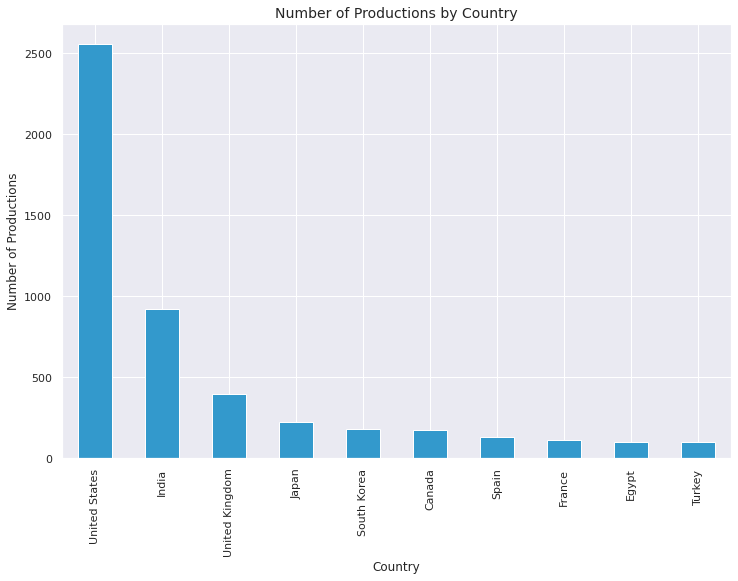

In [21]:
# Create our bar graph
plt.figure(figsize=(12,8))
top_10_countries.plot(kind='bar', color = '#3399CC')
plt.title("Number of Productions by Country", fontsize = 14)
plt.xlabel("Country")
plt.ylabel("Number of Productions")
plt.savefig('Number_of_Productions_Bar.png')
plt.show()

<P>Can we create this as a pie graph?  Yes!</P>

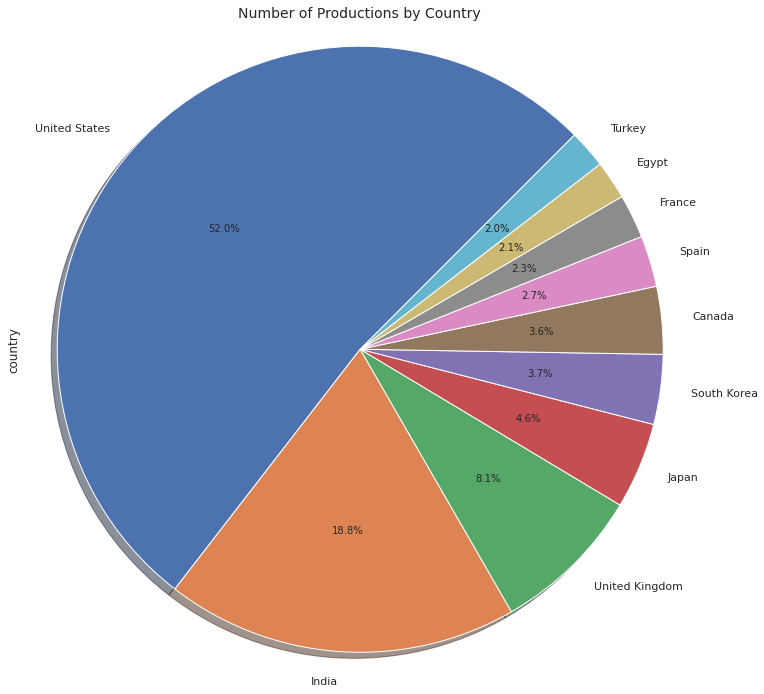

In [22]:
# Create our bar graph
plt.figure(figsize=(12,12))
top_10_countries.plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=45)
plt.title("Number of Productions by Country", fontsize = 14)
plt.axis('equal')
plt.savefig('Number_of_Productions_Pie.png')
plt.show()

<P>This pie graph shows that of the Top 10 Countries in our list, the United States produced a little more than half of the overall total productions of those Top 10 Countries.  In other words, if we added the productions for all ten countries in our list, the total would be 4,911.  The United States produced 2,555 of the titles, so 2,555/4,911 = 0.52026, or 52.0%.</P>

<P>Now let's create a second bar graph that shows the release years and the number of production titles in the Netflix catalog by release year (for simplicity purposes, we will collect data going back 20 years).  An example of a production title would be the TV show "Friends" or the movie "Star Wars".</P>

In [23]:
# Store the data listing the release years of production titles available on Netflix
netflix_releases = df_copy_netflix.release_year.value_counts()[:20].sort_index(axis=0)

In [24]:
netflix_releases

2001      35
2002      45
2003      47
2004      58
2005      72
2006      85
2007      84
2008     121
2009     132
2010     162
2011     163
2012     208
2013     257
2014     315
2015     502
2016     820
2017     958
2018    1021
2019     899
2020     805
Name: release_year, dtype: int64

<P>Based on our data, the number of production titles released in 2018 was the largest, whereas the number of production titles released in 2001 was the smallest.  In 2001, Netflix was mostly DVD sales and rental by mail.  Consumers were still unfamiliar with Netflix, as they were renting DVD and VHS movies at places such as Blockbuster Video.  Moreover, DVD was still a new media format, before Blu-Ray emerged in 2006.</P>
 
<P>Netflix established a new business model in 2007, when it became the first of its kind in offering media streaming via an OTT (Over The Top) platform.  Netflix had remained the only streaming service available; however, the number of production titles that became available on Netflix started declining after 2018.  This is likely due to:</P>
    
<OL>
<LI>Other streaming services such as Disney+, Paramount+, Amazon Prime, Peacock, etc. that competed against Netflix</LI>
<LI>Popular production titles leaving Netflix due to contractual obligations or otherwise (e.g., canceled due to low ratings)</LI>
<LI>Free OTT services such as Pluto TV, which broadcasted those same production titles</LI>
</OL>

<P>There is no direct correlation between the decline of production titles on Netflix and number of subscribers.  In other words, even though the number of production titles available on Netflix went down after 2018, it did not go down by a lot and the number of subscribers stayed largely the same.  It's possible that Netflix may have added more subscribers.</P>

<P>Interestingly, the number of production titles available on Netflix in 2020 did not increase despite more people staying home due to COVID-19.  It declined, but not by a lot.  Disney+ was Netflix's biggest competitor in 2020, as it was adding production titles (some of which migrated from Netflix) and adding more subscribers.  In 2021, Disney+ reached 100 million subscribers, but Netflix still has over 200 million as of this writing.</P>

<P>This graph does NOT display the number of movie and TV show titles available per year.  That will be covered in Question 3.</P>

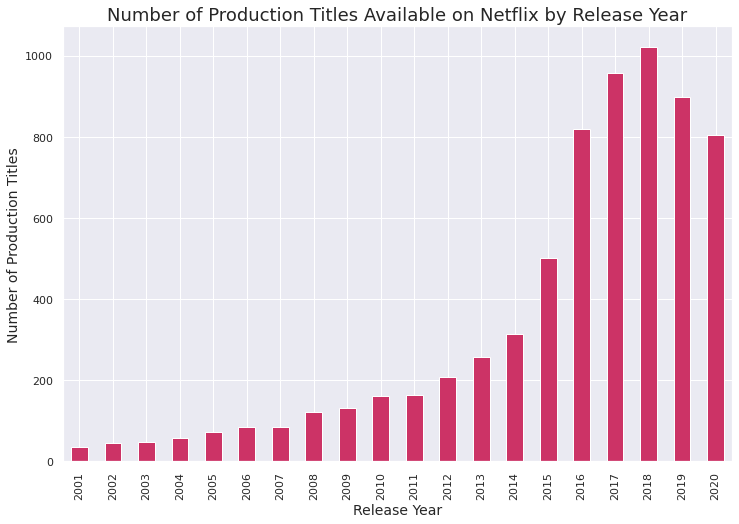

In [25]:
plt.figure(figsize=(12,8))
netflix_releases.plot(kind='bar', color = '#CC3366')
plt.title("Number of Production Titles Available on Netflix by Release Year", fontsize=18)
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Number of Production Titles", fontsize=14)
plt.savefig('Number_of_Production_Titles_Bar.png')
plt.show()

<P><B>Question 2:  Identify the categories for movies and TV shows in the Netflix dataset and plot a graph illustrating how many titles fall under each category.</B></P>

<P>After browsing through the dataset, we decided on the following categories to use in our graph.  Please note that we are using the original Netflix dataset, not the newly created one used in Question 1:</P>

<UL>
<LI>Action & Adventure</LI>
<LI>Anime</LI>
<LI>Children & Family</LI>
<LI>Classic Movies</LI>
<LI>Comedy</LI>
<LI>Crime & TV</LI>
<LI>Documentaries</LI>
<LI>Drama</LI>
<LI>Horror</LI>
<LI>International</LI>
<LI>Kids' TV</LI>
<LI>Sci-FI</LI>
<LI>Thriller</LI>
</UL>

<P>For each category, we do a search for the category name and compile the number of titles under each category.  We store the numbers separately, but we also print out the numbers just to test our data and see that it is producing the results we expect.</P>

In [26]:
# Create separate datasets for each category and count the number of titles that contain the string
# Also some categories are listed as either singular ("Comedy") or plural ("Comedies"), so we do a
# partial search of the string, to generate more results

actionadventure = df_netflix[df_netflix['listed_in'].str.contains("Action & Advent")].listed_in.count()
anime = df_netflix[df_netflix['listed_in'].str.contains("Anime")].listed_in.count()
childrenandfamily = df_netflix[df_netflix['listed_in'].str.contains("Childr")].listed_in.count()
classicmovies = df_netflix[df_netflix['listed_in'].str.contains("Classic")].listed_in.count()
comedy = df_netflix[df_netflix['listed_in'].str.contains("Comed")].listed_in.count()
crimeandtv = df_netflix[df_netflix['listed_in'].str.contains("Crime")].listed_in.count()
documentaries = df_netflix[df_netflix['listed_in'].str.contains("Documenta")].listed_in.count()
drama = df_netflix[df_netflix['listed_in'].str.contains("Drama")].listed_in.count()
horror = df_netflix[df_netflix['listed_in'].str.contains("Horror")].listed_in.count()
international = df_netflix[df_netflix['listed_in'].str.contains("International")].listed_in.count()
kidstv = df_netflix[df_netflix['listed_in'].str.contains("Kids")].listed_in.count()
romance = df_netflix[df_netflix['listed_in'].str.contains("Roma")].listed_in.count()
scifi = df_netflix[df_netflix['listed_in'].str.contains("Sci-Fi & Fan")].listed_in.count()
thriller = df_netflix[df_netflix['listed_in'].str.contains("Thrill")].listed_in.count()

In [27]:
# Print the total number of Action & Adventure titles in the dataset
print("There are", actionadventure, "Action & Adventure titles in the dataset.")

There are 871 Action & Adventure titles in the dataset.


In [28]:
# Print the total number of Classic Movies titles in the dataset
print("For Classic Movies, we have a total of", classicmovies, "titles in the dataset.")

For Classic Movies, we have a total of 130 titles in the dataset.


In [29]:
# Print the total number of Sci-Fi & Fantasy titles in the dataset
print("Sci-Fi & Fantasy has a total of", scifi, "titles in the dataset.")

Sci-Fi & Fantasy has a total of 294 titles in the dataset.


In [30]:
# Print the total number of titles for each category in the dataset
print("Here are the total number of titles for each category we wish to analyze.\n")
print("Note that it is possible that each title can fall into more than one category.\n")
print("Action & Adventure: ", actionadventure)
print("Anime: ", anime)
print("Children & Family: ", childrenandfamily)
print("Classic Movies: ", classicmovies)
print("Comedy: ", comedy)
print("Crime & TV: ", crimeandtv)
print("Documentaries: ", documentaries)
print("Drama: ", drama)
print("Horror: ", horror)
print("International: ", international)
print("Kids & TV: ", kidstv)
print("Romance: ", romance)
print("Sci-Fi: ", scifi)
print("Thriller: ", thriller)

Here are the total number of titles for each category we wish to analyze.

Note that it is possible that each title can fall into more than one category.

Action & Adventure:  871
Anime:  205
Children & Family:  532
Classic Movies:  130
Comedy:  2344
Crime & TV:  427
Documentaries:  786
Drama:  2810
Horror:  381
International:  3636
Kids & TV:  414
Romance:  864
Sci-Fi:  294
Thriller:  541


<P>Now that we have the numbers, we can use them to plot our graph as shown below.</P>

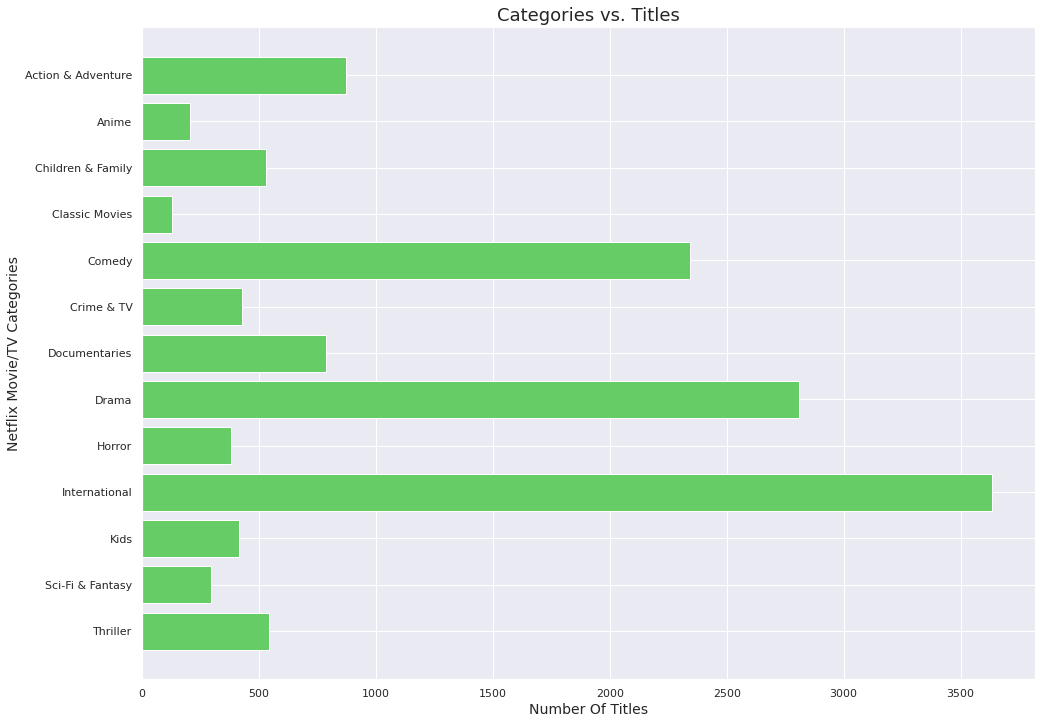

In [31]:
# Setting up our bar graph.  To make things easier, the categories are listed in reverse,
# so that our graph presents the data properly

categories =["Thriller",
             "Sci-Fi & Fantasy",
             "Kids",
             "International",
             "Horror",
             "Drama",
             "Documentaries",
             "Crime & TV",
             "Comedy",
             "Classic Movies",
             "Children & Family",
             "Anime",
             "Action & Adventure"]
totals = [thriller,
          scifi,
          kidstv,
          international,
          horror,
          drama,
          documentaries,
          crimeandtv,
          comedy,
          classicmovies,
          childrenandfamily,
          anime,
          actionadventure]


# Create the graph using commands from matplotlib library
plt.figure(figsize=(16,12))
plt.barh(categories, totals, color='#66CC66')
plt.title("Categories vs. Titles", fontsize=18)
plt.xlabel("Number Of Titles", fontsize=14)
plt.ylabel("Netflix Movie/TV Categories", fontsize=14)
plt.savefig('Netflix_Movie_TV_Categories.png')
plt.show()

<P>Based on this graph, International had the most titles at 3636, while Anime had the smallest at 205.</P>

<P><B>Question 3:  Create a graph that shows the number of Movies and TV shows added to Netflix each year.</B></P>

<P>To answer this question, let's continue to work with our original Netflix dataset.</P>

In [32]:
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


<P>Now let's obtain a count of movies and TV shows in our dataset.</P>

In [33]:
netflix_movies = df_netflix[df_netflix['type'].str.contains("Movie")].type.count()
netflix_tv = df_netflix[df_netflix['type'].str.contains("TV Show")].type.count()

print("Number of Movies in our original Netflix dataset: ", netflix_movies)
print("Number of TV Shows in our original Netflix dataset: ", netflix_tv)

Number of Movies in our original Netflix dataset:  5377
Number of TV Shows in our original Netflix dataset:  2410


<P>What we will do is print out the number of Movies and TV Shows available on Netflix since 2008.  We will use a series of commands.  The first and most apparent one is a command called slice, where we want to parse the year from the formal date.  In other words, we will take a date such as "August 19, 2020" and use slice to get 2020, then store the year under year_added.</P>

In [34]:
df_netflix['year_added'] = df_netflix['date_added'].str.slice(start=-4)
netflix_movies_and_tvshows = df_netflix.groupby(['year_added', 'type'], as_index=False).show_id.count()
netflix_movies_and_tvshows.columns = ['year_added', 'type', 'count']
netflix_movies_and_tvshows = netflix_movies_and_tvshows.pivot(index='year_added', columns='type', values='count').reset_index()
netflix_movies_and_tvshows.fillna(0, inplace = True)

# Create a DataFrame called netflix_data that contains the year, number of movies, and number of TV shows
netflix_data = pd.DataFrame(dict(Year   = netflix_movies_and_tvshows['year_added'],
                                 Movie  = netflix_movies_and_tvshows['Movie'],
                                 TVshow = netflix_movies_and_tvshows['TV Show']))

# Display the dataset for the new netflix_data Dataframe
netflix_data

,Year,Movie,TVshow
0,2008,1.0,1.0
1,2009,2.0,0.0
2,2010,1.0,0.0
3,2011,13.0,0.0
4,2012,3.0,0.0
5,2013,6.0,5.0
6,2014,19.0,6.0
7,2015,58.0,30.0
8,2016,258.0,185.0
9,2017,864.0,361.0


<P>How does this compare to our copy dataset that we used in Question 1?</P>

In [35]:
df_copy_netflix['year_added'] = df_copy_netflix['date_added'].str.slice(start=-4)
netflix_copy_movies_and_tvshows = df_copy_netflix.groupby(['year_added', 'type'], as_index=False).show_id.count()
netflix_copy_movies_and_tvshows.columns = ['year_added', 'type', 'count']
netflix_copy_movies_and_tvshows = netflix_copy_movies_and_tvshows.pivot(index='year_added',
                                                              columns='type',
                                                              values='count').reset_index()
netflix_copy_movies_and_tvshows.fillna(0, inplace = True)

# Create a DataFrame called netflix_copy_data that contains the year, number of movies, and number of TV shows
netflix_copy_data = pd.DataFrame(dict(Year   = netflix_copy_movies_and_tvshows['year_added'],
                                      Movie  = netflix_copy_movies_and_tvshows['Movie'],
                                      TVshow = netflix_copy_movies_and_tvshows['TV Show']))

# Display the dataset for the new netflix_copy_data Dataframe
netflix_copy_data

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Movie,TVshow
0,2008,1.0,1.0
1,2009,2.0,0.0
2,2010,1.0,0.0
3,2011,13.0,0.0
4,2012,3.0,0.0
5,2013,6.0,5.0
6,2014,19.0,6.0
7,2015,54.0,29.0
8,2016,249.0,175.0
9,2017,839.0,320.0


<P>In both instances, the year is stored as a character string object.  The values for movie and TVshow are float64, which are numerical and necessary to plot our data properly.</P>

In [36]:
# Get the info about the netflix_data DataFrame
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    14 non-null     object 
 1   Movie   14 non-null     float64
 2   TVshow  14 non-null     float64
dtypes: float64(2), object(1)
memory usage: 464.0+ bytes


<P>Now that we have some background information on our dataset, it's time to plot our data and create our graph using our dataframe df_netflix.</P>

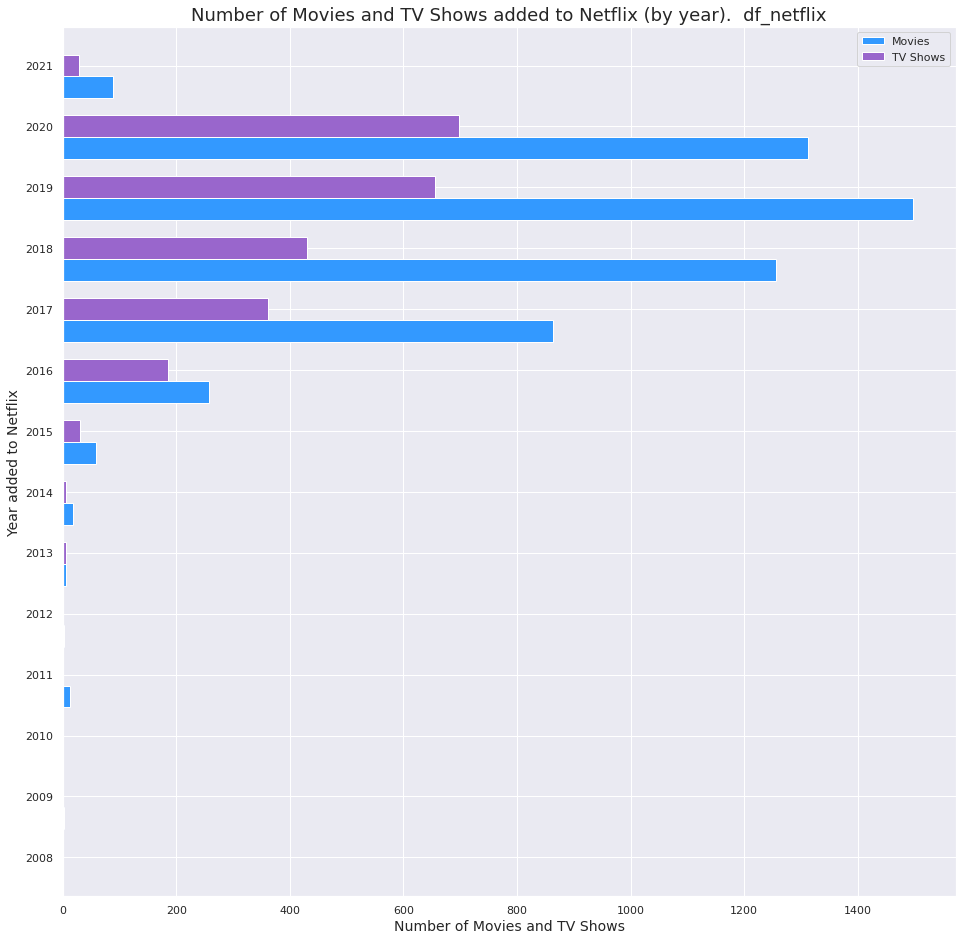

In [37]:
ind = np.arange(len(netflix_data))
width = 0.36

fig1, ax1 = plt.subplots()
ax1.barh(ind, netflix_data.Movie, width, color='#3399FF', label="Movies")
ax1.barh(ind + width, netflix_data.TVshow, width, color='#9966CC', label="TV Shows")

ax1.set(yticks=ind + width, yticklabels=netflix_data.Year, ylim=[2*width - 1, len(netflix_data)])
ax1.set_title("Number of Movies and TV Shows added to Netflix (by year).  df_netflix", fontsize=18)
ax1.set_ylabel("Year added to Netflix", fontsize=14)
ax1.set_xlabel("Number of Movies and TV Shows", fontsize=14)
ax1.legend()

fig1.set_size_inches(16, 16)
plt.savefig('Number_of_Movies_TV_DF1.png')
plt.show()

<P>This same graph using our dataset df_copy_netflix:</P>

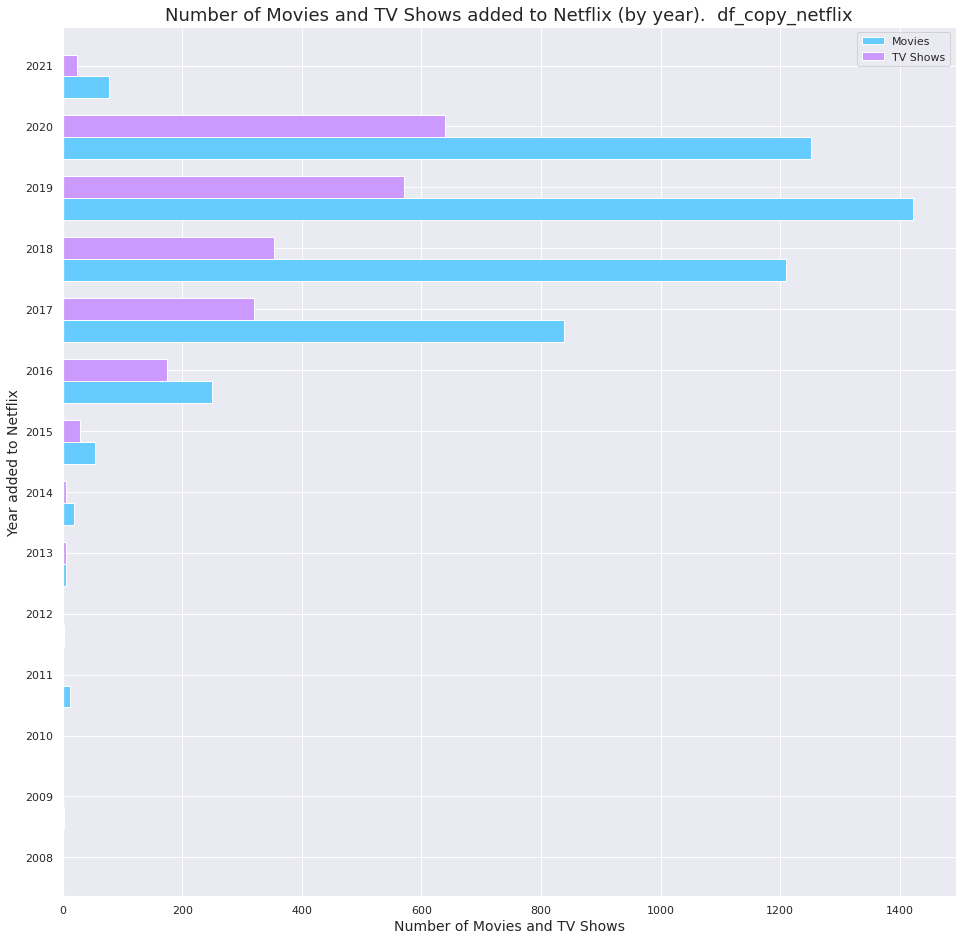

In [38]:
ind = np.arange(len(netflix_copy_data))
width = 0.36

fig2, ax2 = plt.subplots()
ax2.barh(ind, netflix_copy_data.Movie, width, color='#66CCFF', label="Movies")
ax2.barh(ind + width, netflix_copy_data.TVshow, width, color='#CC99FF', label="TV Shows")

ax2.set(yticks=ind + width, yticklabels=netflix_copy_data.Year, ylim=[2*width - 1, len(netflix_copy_data)])
ax2.set_title("Number of Movies and TV Shows added to Netflix (by year).  df_copy_netflix", fontsize=18)
ax2.set_ylabel("Year added to Netflix", fontsize=14)
ax2.set_xlabel("Number of Movies and TV Shows", fontsize=14)
ax2.legend()

fig2.set_size_inches(16, 16)
plt.savefig('Number_of_Movies_TV_DF2.png')
plt.show()

<P>In both instances, our graphs were horizontal bar charts.</P>

<P>From this data, we can make the following conclusions:</P>

<UL>
    <LI>Even though the new dataset (df_copy_netflix) eliminated some rows from the original dataset (df_netflix), it did not result in anything significant with our findings.  We did not see, for instance, the number of TV shows exceed the number of movies in any given year.</LI>
    <LI>Netflix had one Movie and one TV Show available for streaming in 2008. This was because streaming media was an emerging technology at the time and Netflix was the first to adopt what we now know as OTT (Over The Top). High Speed Internet Access (i.e., HSIA or broadband access) was still not widely available, and Netflix was still a DVD rental service.</LI>
    <LI>The iPhone was the first smartphone invented (and we probably remember that presentation where the late Steve Jobs introduced it during the Macworld San Francisco 2007 Keynote Address on January 9, 2007).  Despite this, the Netflix mobile app was not yet available to watch movies and TV shows anywhere and anytime.  That would not be until 2010.</LI>
    <LI>After 2010, the number of movie titles added to Netflix increased.  However, Netflix did not add any TV show titles during this period.</LI>
    <LI>Netflix would start adding more TV show titles in 2013, five years after it added one TV show title.</LI>
    <LI>From 2015 to 2016, Netflix added 200 movie titles and 155 TV show titles.</LI>
    <LI>From 2017 onward, Netflix added 3X to 4X more movie titles and TV show titles to its catalog.</LI>
    <LI>From 2019 to 2020, the number of movie titles decreased while the number of TV show titles increased.</LI>
    <LI>In 2021, Netflix is still adding more Movie titles than TV Show titles, but the numbers may be much smaller due to contractual obligations with film companies or productions moving to other competing services such as Disney+, Paramount+, Amazon Prime, Peacock, etc. We did see this trend shift in 2020, but we won't know until the end of 2021 how many movie and TV Show titles were added to Netflix and if those numbers are smaller than in 2020.</LI>
</UL>

<P><B>Question 4:  What is the Ratings Distribution for the Movies and TV Shows in our Netflix dataset?  Create a graph that illustrates the Ratings Distribution.</B></P>

<P>First, let's create a dataframe that lists the ratings and the number of Movies and TV Shows per rating.  We will use the information from our original dataset.</P>

In [39]:
# Isolating the ratings information from our original Netflix dataset
ratings = df_netflix.groupby(['rating', 'type'], as_index=False).title.count()
ratings.columns = ['ratings', 'type', 'count']
ratings = ratings.pivot(index='ratings', columns='type', values='count').reset_index()
ratings.fillna(0, inplace = True)

# Dataframe that stores the ratings (i.e., G, R, PG, TV-MA, TV-Y7, etc.) and
# number of Movies and TV shows per rating.  We will store it in a dataframe called,
# appropriately enough, the_ratings
the_ratings = pd.DataFrame(dict(Rating = ratings['ratings'],
                                Movie  = ratings['Movie'],
                                TVshow = ratings['TV Show']))

# Print out our dataframe the_ratings
the_ratings

,Rating,Movie,TVshow
0,G,39.0,0.0
1,NC-17,3.0,0.0
2,NR,79.0,5.0
3,PG,247.0,0.0
4,PG-13,386.0,0.0
5,R,663.0,2.0
6,TV-14,1272.0,659.0
7,TV-G,111.0,83.0
8,TV-MA,1845.0,1018.0
9,TV-PG,505.0,301.0


<P>Now what we will do is create a vertical bar chart, where we can look at each rating, compare the number of Movies and TV Shows per rating, and plot them side-by-side.  We will also add values to the top of each bar to obtain the actual numbers.</P>

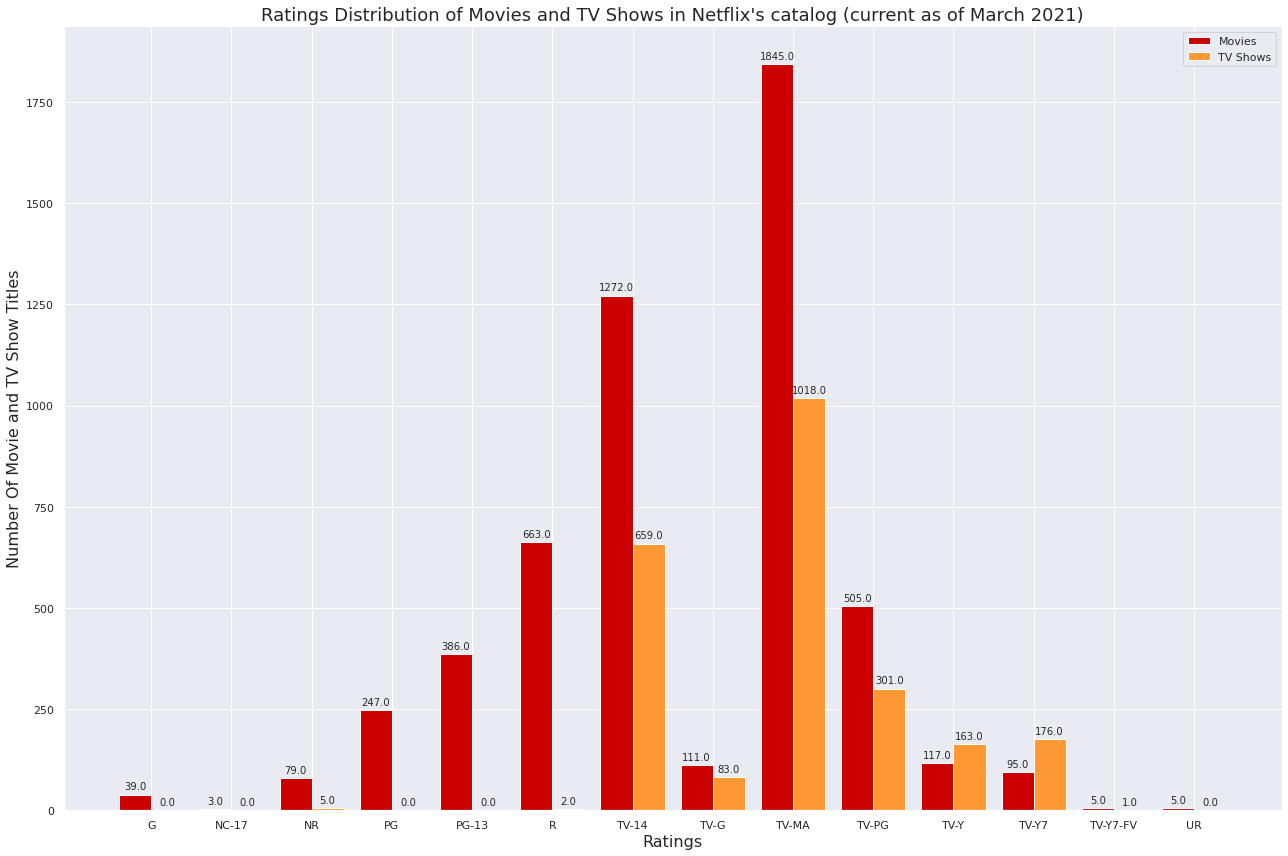

In [40]:
# We will need these labels to list the ratings (i.e., G, R, PG, TV-MA, TV-Y7, etc.)
labels = the_ratings['Rating']

ind = np.arange(len(the_ratings))
width = 0.4

# Create the axes for our bar graph
fig3, ax3 = plt.subplots()
Movies_rects = ax3.bar(ind - width/2, the_ratings.Movie, width, color='#CC0000', label="Movies")
TVshows_rects = ax3.bar(ind + width/2, the_ratings.TVshow, width, color='#FF9933', label="TV Shows")

# Create the labels for our bar graph
ax3.set_title("Ratings Distribution of Movies and TV Shows in Netflix's catalog (current as of March 2021)", fontsize=18)
ax3.set_ylabel("Number Of Movie and TV Show Titles", fontsize=16)
ax3.set_xlabel("Ratings", fontsize=16)

# Create the tick labels, set the size of the graph, and set the font sizes
ax3.set_xticks(ind)
ax3.set_xticklabels(labels)
fig3.set_size_inches(18.0, 12.0)
plt.rcParams.update({'font.size': 10})
ax3.legend()

# Function to generate labels on top of the bars
def gen_label(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax3.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Generate the labels
gen_label(Movies_rects)
gen_label(TVshows_rects)

# Save our graph in *.png format and display the graph
fig3.tight_layout()
plt.savefig('Ratings_Distribution.png')
plt.show()

<P>Based on this graph, we can make the following assessments:</P>

<UL>
    <LI>The majority of titles (both Movies and TV Shows) were rated TV-MA, with 1845 Movies and 1018 TV Shows.</LI>
    <LI>Even though the majority of movies were rated TV-MA, they were either theatrical releases in foreign countries; movies that never saw a theatrical release and went straight to home video (i.e., VHS, DVD, or Blu-Ray); and/or movies made specifically for television.</LI>
    <LI>The rating that had the fewest titles was NC-17, with just three Movies and no TV Shows.  This was expected, since NC-17 is a film rating determined by the Motion Picture Association (previously the MPAA, or Motion Picture Association of America) and is specific to Movies.</LI>
    <LI>The majority of content whose film ratings are G, PG, PG-13, R, and NC-17 are Movies.  As explained in the previous bullet point, these ratings are determined by the Motion Picture Association.</LI>
    <LI>Two TV Shows were given an R-rating. This is an error with the Netflix data compiled from Flixable, where a title was listed as a TV Show, but Flixable misidentified it as a Movie and gave it a rating that was intended for movies. This same error happened with five other titles whose rating was NR (Not Rated); see next bullet point.</LI>
    <LI>There are 79 Movies rated NR (Not Rated), but five Movies rated UR (Un Rated). This is because the five Movies rated UR are "Director's Cut" versions of Movies that were most likely rated R (and those versions of the same movies are not included in Netflix's catalog; it may also explain why they are listed as TV Shows whose rating is NR, because Flixable misidentified them as such). The Movies rated NR were not submitted to the MPA or any other organization for an official rating.</LI>
    <LI>There were more TV Shows rated TV-Y and TV-Y7 than Movies.</LI>
    <LI>The majority of content available on Netflix is rated TV-14 and TV-MA; this helps identify what subscriber base Netflix is targeted to. If the dataset we obtained came from a service such as Disney+, this graph would be reversed (with the majority of Movies rated G and PG; and TV Shows rated TV-Y, TV-Y7, TV-G and TV-PG).</LI>
</UL>